In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

In [3]:
#讀檔
dataset = pd.read_csv("titanic/train.csv")
dataset.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#觀察資料幾列幾行
dataset.shape

(891, 12)

In [5]:
#觀察整個資料集的資訊
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#設定seaborn為預設繪圖library
sns.set()

In [13]:
def bar_chart(feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

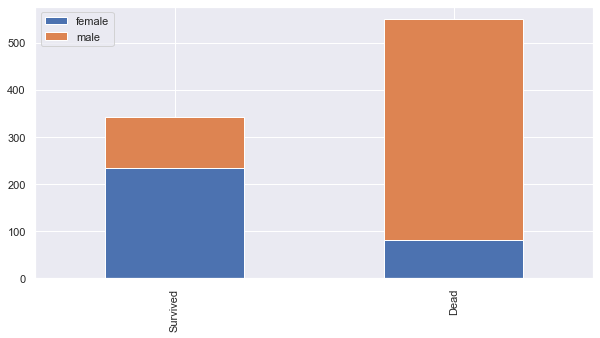

In [14]:
#分別秀出生還/死亡的男女長條圖
bar_chart('Sex')

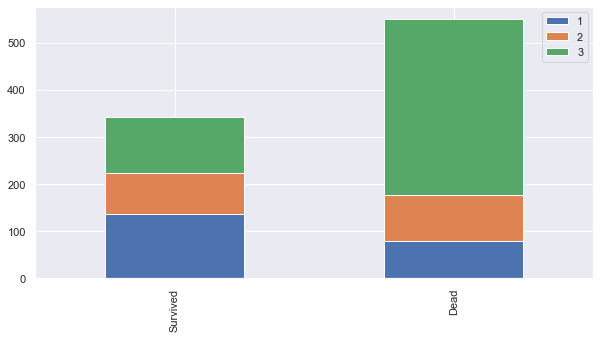

In [15]:
#分別秀出生還/死亡的艙等長條圖
bar_chart('Pclass')

In [17]:
# 計算各個行(欄位)裡有多少個“NaN”
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Name

In [18]:
#觀察Name欄位
dataset['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [19]:
#取出Mr., Mrs., Miss
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#https://reurl.cc/qeZQE
#https://reurl.cc/Neb8n

In [20]:
#統計各稱謂的人數
dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Capt          1
Jonkheer      1
Ms            1
Countess      1
Sir           1
Don           1
Mme           1
Lady          1
Name: Title, dtype: int64

In [21]:
#titlemapping
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mile": 3,"Capt": 3, "Jonkheer": 3, "Ms": 3, "Countess": 3, "Sir": 3, "Don": 3, "Mme": 3, "Lady": 3,}
dataset['Title'] = dataset['Title'].map(title_mapping)

In [22]:
#現在的dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [23]:
#現在的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


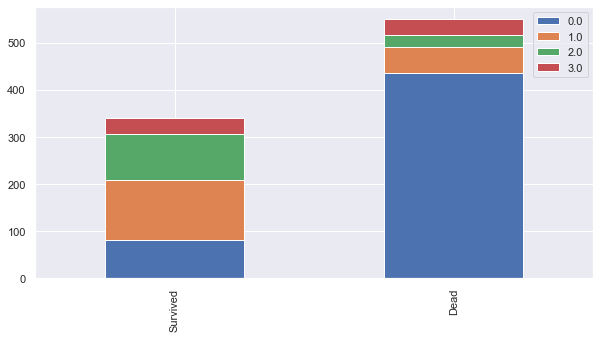

In [24]:
#秀出Title/生還死亡的分佈
bar_chart('Title')

In [25]:
# 刪除Name欄位
dataset.drop('Name', axis=1, inplace=True)

In [26]:
#目前的dataframe
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


# Sex

In [118]:
#mapping sex
#請輸入程式碼
dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [ ]:
bar_chart('Sex')

In [ ]:
#目前的ddataframe
dataset.head(100)

# Age

In [ ]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
#請輸入程式碼
dataset["Age"]

In [ ]:
#年齡/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, dataset['Age'].max()))
facet.add_legend()
 
plt.show()

In [122]:
#依年齡區間做mapping function
#請輸入程式碼

In [ ]:
#目前的dataframe
dataset.head()

In [ ]:
#秀出年齡/生還死亡的分佈
#請輸入程式碼

# Embarked (登船地點)

In [ ]:
#分析各票種登船地點人數
#請輸入程式碼
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
#填補登船地點缺失資料
#請輸入程式碼
dataset.head(100)

In [ ]:
# 登船地點的Mapping Function
#請輸入程式碼
dataset.head(100)

# Fare(票價)

In [ ]:
#填補票價缺失的資料 
#請輸入程式碼
dataset.head(50)

In [ ]:
#票價/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, dataset['Fare'].max()))
facet.add_legend()
 
plt.show()

In [ ]:
#依票價區間做mapping function
#請輸入程式碼

In [ ]:
#目前的dataframe
dataset.head()

In [ ]:
#觀察船艙編號資料
#請輸入程式碼

In [ ]:
#觀察船艙編號資料 =>取出第一個字母
#請輸入程式碼

In [ ]:
#分析各票種船艙種類人數
#請輸入程式碼
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [139]:
#船艙Mapping
#請輸入程式碼

In [ ]:
#填補船艙種類缺失資料
#請輸入程式碼

In [ ]:
#目前的dataframe
dataset.head()

# Sibsp & Parch

In [142]:
#合併Sibsp & Parch
#請輸入程式碼

In [ ]:
#家族人口/生還死亡分布圖
facet = sns.FacetGrid(dataset, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, dataset['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [ ]:
#家族人口的Mapping Function
#請輸入程式碼

In [ ]:
#目前的dataframe
dataset.head()

# 資料清洗

In [146]:
#刪除Sibsp, Parch, Ticket
#請輸入程式碼

In [ ]:
#設定預測目標變數與解釋變數
#請輸入程式碼
dataset_data.shape, dataset_target.shape

In [ ]:
#目前的所有解釋變數
dataset_data.head()

In [ ]:
#確認欄位的資料型態均為數值型別
#請輸入程式碼

# 建置模型-DNN

In [168]:
#導入keras與sklearn
#請輸入程式碼
from sklearn import preprocessing

In [ ]:
#建立模型函式
def build_model():
#請輸入程式碼

In [ ]:
#建置繪圖函式
def show_train_history(train_history,train,validation,label):
    #請輸入程式碼
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

In [171]:
#feature標準化
#請輸入程式碼

In [ ]:
#訓練模型
#請輸入程式碼

#開始訓練模型
#請輸入程式碼

#顯示訓練結果
#請輸入程式碼
print ('\nTrain Acc:', score[1])

In [ ]:
#顯示訓練結果
#請輸入程式碼